In [2]:
# Importing Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Loading Data
df = pd.read_excel("FLETES LARRAZ 2024.xlsx", sheet_name="ENERO 2025")

In [3]:
#DATA CLEANING 

## Limpieza de filas y columnas
df.drop(0,inplace=True)
df.drop(1,inplace=True)
df.drop(3,inplace=True)
df.drop(4,inplace=True)
df.drop(columns="Unnamed: 0",inplace=True)
df.drop(columns="Unnamed: 11",inplace=True)
df.drop(columns="Unnamed: 12",inplace=True)
df.drop(columns="Unnamed: 13",inplace=True)
df.drop(columns="Unnamed: 15",inplace=True)
df.drop(columns="Unnamed: 16",inplace=True)
df = df.drop(df.columns[-2:], axis=1)

#La primera fila se convierte en los titulos
df= df.rename(columns=df.iloc[0]).drop(df.index[0]).reset_index(drop=True)

#Borras los datos que el precio del flete es 0
df = df[df["PRECIO-FLETE"]!=0]


In [4]:
df["nro_camion"]=df["FECHA"].notna().cumsum()
columnas_nuevo_orden = ['nro_camion', 'FECHA', 'PLANILLA', 'CAMIÓN', 'CLIENTE', 'BULTOS', 'LOCALIDAD', 'EXPRESO ', 'REMITOS', 'PRECIO-FLETE', 'PRECIO-OTROS', 'VALOR DECLARADO']
df = df[columnas_nuevo_orden]

In [5]:
df.reset_index(inplace=True)

In [6]:
df.drop(columns="index",inplace=True)

In [7]:
df_viajes = df[df["LOCALIDAD"]!="Rosario"].groupby("nro_camion").size().to_frame("Cantidad_de_Destinos")
df_viajes.drop(22,inplace=True)

In [8]:
localidades_camiones = df[df["FECHA"].notna()]["LOCALIDAD"].to_frame()
localidades_camiones.reset_index(inplace=True)
localidades_camiones.drop(columns="index",inplace=True)
localidades_camiones.index +=1

In [9]:
df_viajes["LOCALIDAD"] = localidades_camiones["LOCALIDAD"]

In [10]:
df_viajes["PROVEEDOR_A"]=np.nan
df_viajes["PROVEEDOR_B"]=np.nan
df_viajes["Opcion_Conveniente"] = np.nan

In [11]:
df_viajes.loc[df_viajes["LOCALIDAD"] == "CABA", "PROVEEDOR_A"] = 186600 + 55500 * (df_viajes["Cantidad_de_Destinos"] - 1)
df_viajes.loc[df_viajes["LOCALIDAD"].isin(["Buenos Aires", "Ciudadela", "Lomas del Mirador", "Moron", "Avellaneda"]), "PROVEEDOR_A"] = 195800 + 55500 * (df_viajes["Cantidad_de_Destinos"] - 1)

In [12]:
df_viajes.loc[df_viajes["Cantidad_de_Destinos"]<=5, "PROVEEDOR_B"] = 232925
df_viajes.loc[df_viajes["Cantidad_de_Destinos"]>5, "PROVEEDOR_B"] = 232925 + (df_viajes["Cantidad_de_Destinos"]-5) * 10700

In [13]:
df_viajes.loc[df_viajes["PROVEEDOR_A"]<df_viajes["PROVEEDOR_B"], "Opcion_Conveniente"] = "Proveedor_A"
df_viajes.loc[df_viajes["PROVEEDOR_B"]<df_viajes["PROVEEDOR_A"], "Opcion_Conveniente"] = "Proveedor_B"

C:\Users\User\AppData\Local\Temp\ipykernel_2748\800994291.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Proveedor_A' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_viajes.loc[df_viajes["PROVEEDOR_A"]<df_viajes["PROVEEDOR_B"], "Opcion_Conveniente"] = "Proveedor_A"


In [14]:
df_viajes

,Cantidad_de_Destinos,LOCALIDAD,PROVEEDOR_A,PROVEEDOR_B,Opcion_Conveniente
nro_camion,,,,,
1,7,Buenos Aires,528800.0,254325.0,Proveedor_B
2,1,Buenos Aires,195800.0,232925.0,Proveedor_A
3,5,Buenos Aires,417800.0,232925.0,Proveedor_B
4,6,Ciudadela,473300.0,243625.0,Proveedor_B
5,5,Lomas del Mirador,417800.0,232925.0,Proveedor_B
6,2,Avellaneda,251300.0,232925.0,Proveedor_B
8,2,Avellaneda,251300.0,232925.0,Proveedor_B
9,5,Buenos Aires,417800.0,232925.0,Proveedor_B
10,7,CABA,519600.0,254325.0,Proveedor_B


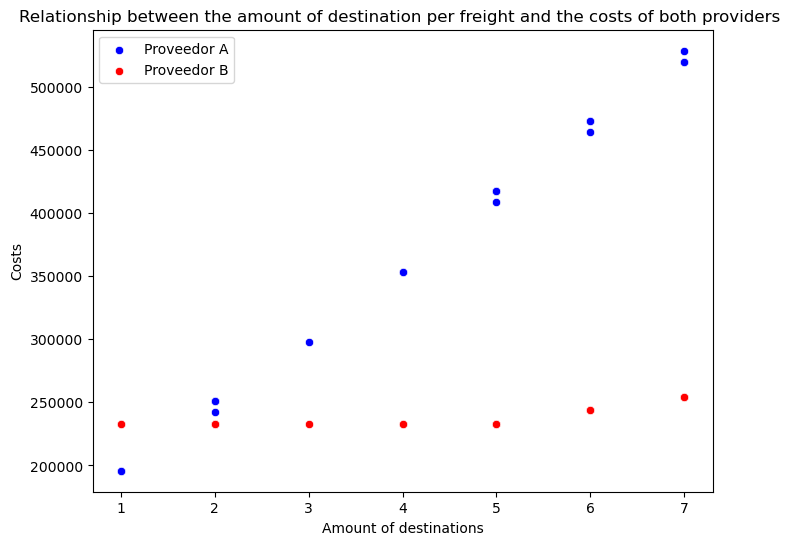

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_viajes, x="Cantidad_de_Destinos", y="PROVEEDOR_A", label="Proveedor A", color="blue")
sns.scatterplot(data=df_viajes, x="Cantidad_de_Destinos", y="PROVEEDOR_B", label="Proveedor B", color="red")
plt.title("Relationship between the amount of destination per freight and the costs of both providers ")
plt.ylabel("Costs")
plt.xlabel("Amount of destinations")
plt.legend()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_2748\3531455015.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)


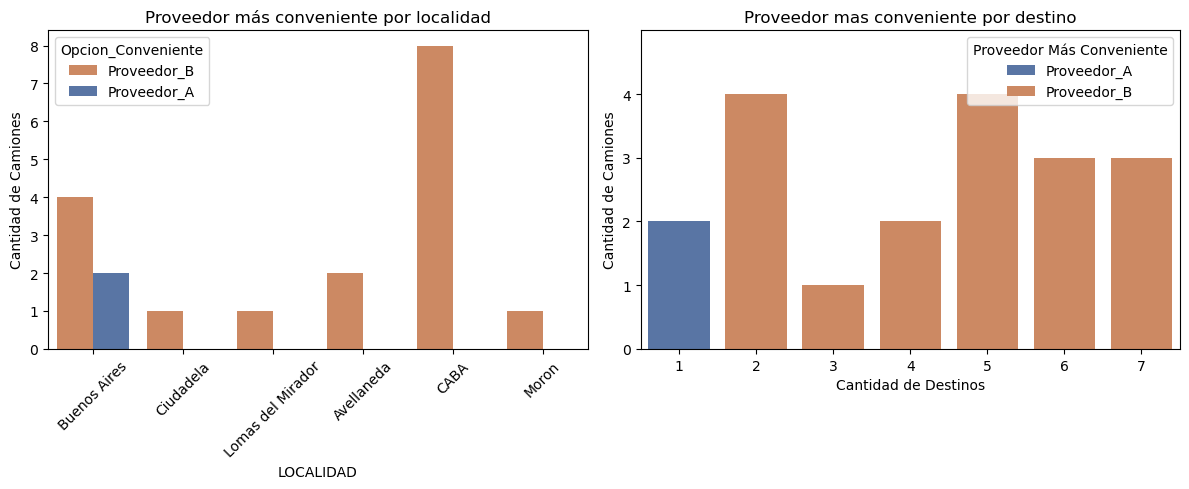

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))


default_palette = sns.color_palette("deep")
reversed_palette = [default_palette[1], default_palette[0]]
sns.countplot(data=df_viajes, x="LOCALIDAD", hue="Opcion_Conveniente", palette=reversed_palette, ax=ax[0])

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
ax[0].set_title("Proveedor más conveniente por localidad")
ax[0].set_ylabel("Cantidad de Camiones")


df_viajes["Cantidad_de_Destinos"] = df_viajes["Cantidad_de_Destinos"].astype(int)

sns.countplot(data=df_viajes, x="Cantidad_de_Destinos", hue="Opcion_Conveniente",palette="deep", ax=ax[1])

max_value = df_viajes["Cantidad_de_Destinos"].value_counts().max()
ax[1].set_yticks(np.arange(0, max_value + 1, step=1))

ax[1].set_title("Proveedor mas conveniente por destino")
ax[1].set_xlabel("Cantidad de Destinos")
ax[1].set_ylabel("Cantidad de Camiones")
ax[1].legend(title="Proveedor Más Conveniente")
ax[1].set_ylim(0, 5)  

plt.tight_layout()
plt.show()
